### Run the following imports before plotting data:

In [24]:
import os; os.makedirs("plotting_results", exist_ok=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Start plotting from here on now, creating new code block for each new plot

#### Histogram presenting variety of products for each day

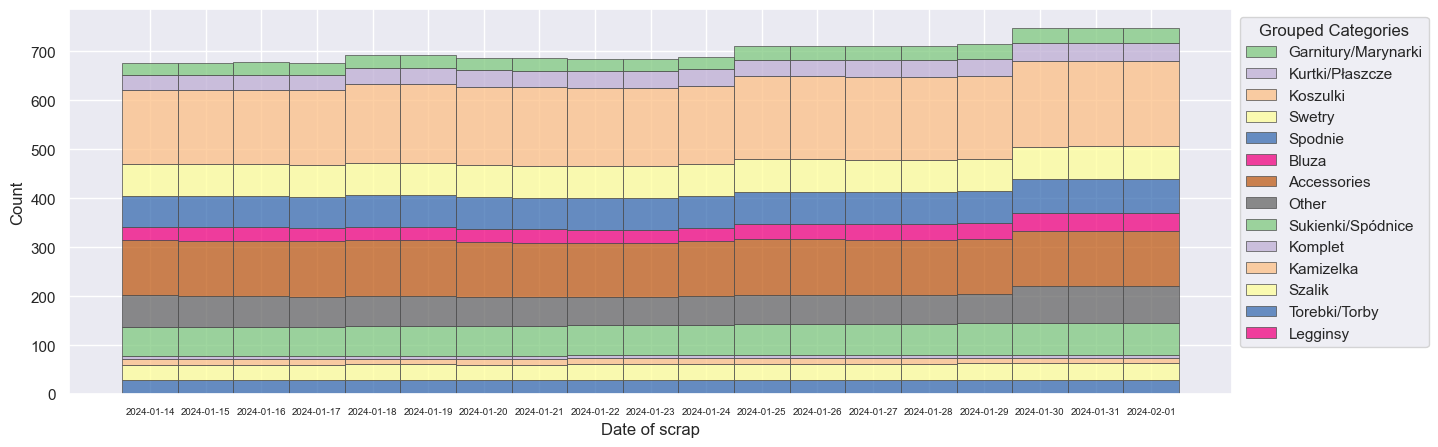

In [79]:
df = pd.read_csv("D:\Projects\PrivateProjects\WebScrapMoodo\single_csv_output\data_for_plotting.csv")

# Group by 'Date of scrap' and 'Product Type', then count the occurrences
df['Grouped Categories'] = df['Category'].replace({'Torba': 'Torebki/Torby', 'Czapka': 'Accessories', 'Portfel': 'Accessories', 'Opaska': 'Accessories',
                                                    'Rękawiczki':  'Accessories', 'Torebka': 'Torebki/Torby', 'Pasek': 'Accessories',
                                                    'Biżuteria': 'Accessories', 'Skarpetki': 'Accessories', 'Klapki': 'Accessories', 'Kolczyki': 'Accessories',
                                                    'Naszyjnik':  'Accessories', 'Okulary':  'Accessories', 'Kapelusz':  'Accessories', 'Gumka do włosów':  'Accessories',
                                                    'Spodnie':  'Spodnie', 'Jeansy':  'Spodnie', 'Klapki':  'Obuwie', 'Buty':  'Obuwie', 'Kurtka':  'Kurtki/Płaszcze',
                                                    'Płaszcz':  'Kurtki/Płaszcze', 'Sweter':  'Swetry', 'Cienki Sweter':  'Swetry', 'T-shirt':  'Koszulki',
                                                    'Koszulka':  'Koszulki', 'Bluzka':  'Koszulki', 'Koszula':  'Koszulki', 'Garnitur':  'Garnitury/Marynarki',
                                                    'Marynarka':  'Garnitury/Marynarki', 'Sukienka':  'Sukienki/Spódnice', 'Spódnica':  'Sukienki/Spódnice',})
grouped_data = df.groupby(['Date of scrap', 'Grouped Categories']).size().reset_index(name='Count')
# print(grouped_data.head(15))

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [15, 5]

# Use lineplot to show the trend of different product types over time
ax = sns.histplot(
    df,
    x="Date of scrap",
    hue="Grouped Categories",
    multiple="stack",
    palette="Accent",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.tick_params(axis='x', labelsize=7)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Save the plot as an image
output_path = "plotting_results"
os.makedirs(output_path, exist_ok=True)
output_file_path = os.path.join(output_path, f"trend_plot_{pd.Timestamp.now().strftime('%Y%m%d%H%M%S')}.png")
plt.savefig(output_file_path)

# Show Plot
plt.show()

#### Number of Products Available for Each selected Size and Category

##### If you want to change sizes, change sizes_to_count = ['XS', 'S', 'M', 'XXL', 'ONE SIZE']
##### If you want to change categories, change categories_to_include = ['Garnitury/Marynarki', 'Koszulki', 'Accessories', 'Szalik', 'Torebki/Torby']

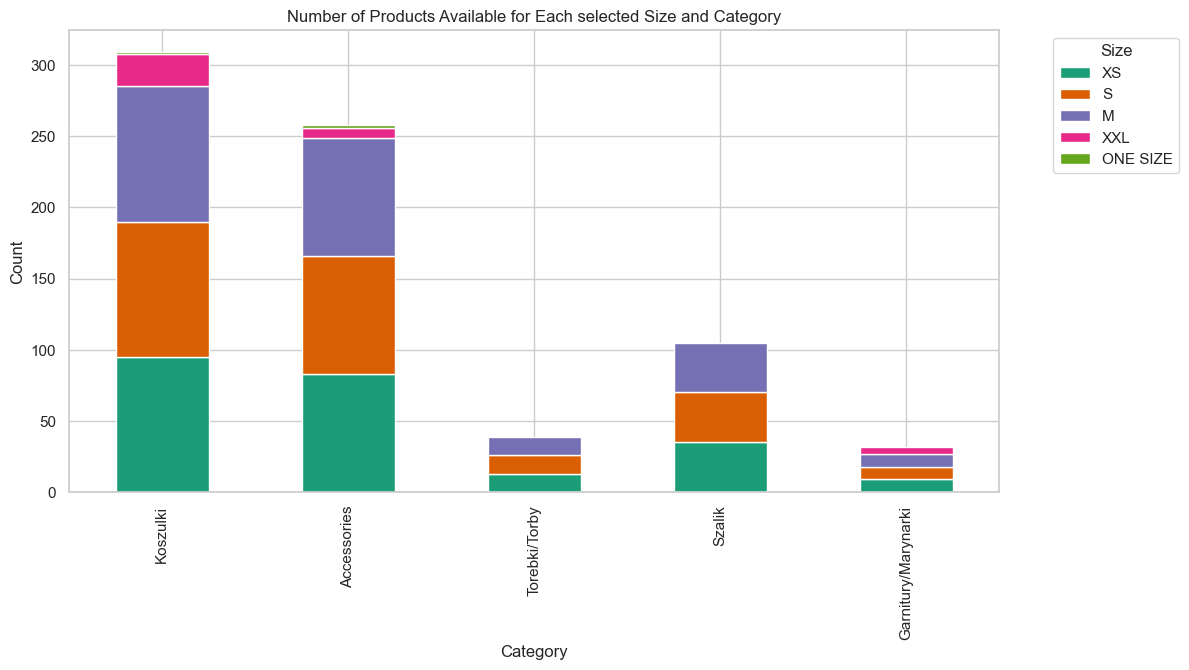

In [80]:
df['Date of scrap'] = pd.to_datetime(df['Date of scrap'])  # Convert 'Date of scrap' to datetime if not already

# Sort the DataFrame by 'Date of scrap' in descending order
df = df.sort_values(by=['Product ID', 'Date of scrap'], ascending=[True, False])

# Keep only the most up-to-date entry for each item
df = df.drop_duplicates(subset=['Product ID'], keep='first').reset_index(drop=True)

# Exclude entries where 'Product Price before Discount' is null
df = df.dropna(subset=['Product Price before Discount'])

# Map the grouped categories
df['Grouped Categories'] = df['Category'].replace({
    'Torba': 'Torebki/Torby', 'Czapka': 'Accessories', 'Portfel': 'Accessories', 'Opaska': 'Accessories',
    'Rękawiczki':  'Accessories', 'Torebka': 'Torebki/Torby', 'Pasek': 'Accessories',
    'Biżuteria': 'Accessories', 'Skarpetki': 'Accessories', 'Klapki': 'Accessories', 'Kolczyki': 'Accessories',
    'Naszyjnik':  'Accessories', 'Okulary':  'Accessories', 'Kapelusz':  'Accessories', 'Gumka do włosów':  'Accessories',
    'Spodnie':  'Spodnie', 'Jeansy':  'Spodnie', 'Klapki':  'Obuwie', 'Buty':  'Obuwie', 'Kurtka':  'Kurtki/Płaszcze',
    'Płaszcz':  'Kurtki/Płaszcze', 'Sweter':  'Swetry', 'Cienki Sweter':  'Swetry', 'T-shirt':  'Koszulki',
    'Koszulka':  'Koszulki', 'Bluzka':  'Koszulki', 'Koszula':  'Koszulki', 'Garnitur':  'Garnitury/Marynarki',
    'Marynarka':  'Garnitury/Marynarki', 'Sukienka':  'Sukienki/Spódnice', 'Spódnica':  'Sukienki/Spódnice',
})

# List of categories to include in the plot
categories_to_include = ['Garnitury/Marynarki', 'Koszulki', 'Accessories', 'Szalik', 'Torebki/Torby']

# Filter dataframe to include only specified categories
df_filtered = df[df['Grouped Categories'].isin(categories_to_include)]

# List of sizes to loop through
sizes_to_count = ['XS', 'S', 'M', 'XXL', 'ONE SIZE']

# Initialize a dictionary to store category counts for each size
category_counts = {size: {} for size in sizes_to_count}

# Iterate through the rows of the filtered dataframe
for index, row in df_filtered.iterrows():
    category = row['Grouped Categories']
    sizes_list = eval(row['Product Size'])
    
    # Check if each size is in the sizes list
    for size in sizes_to_count:
        if size in sizes_list:
            # Increment count for the category and size
            category_counts[size][category] = category_counts[size].get(category, 0) + 1

# Convert dictionary to a DataFrame for easier plotting
count_df = pd.DataFrame(category_counts)

# Set the style of seaborn
sns.set(style="whitegrid", palette='Dark2')

# Grouped Bar Plot - Number of Products for Each Category and Size
count_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Products Available for Each selected Size and Category')
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image
output_path = "plotting_results"
os.makedirs(output_path, exist_ok=True)
output_file_path = os.path.join(output_path, f"grouped_bar_plot_{pd.Timestamp.now().strftime('%Y%m%d%H%M%S')}.png")
plt.savefig(output_file_path)

# Show the plot
plt.show()

#### Price vs. Abundance Correlation (Selected Categories)

##### If you want to change categories of clothing, change categories in selected_categories = ['Garnitury/Marynarki', 'Koszulki', 'Komplet', 'Accessories', 'Szalik', 'Torebki/Torby'] and choose the categories listed in 'Grouped Categories'

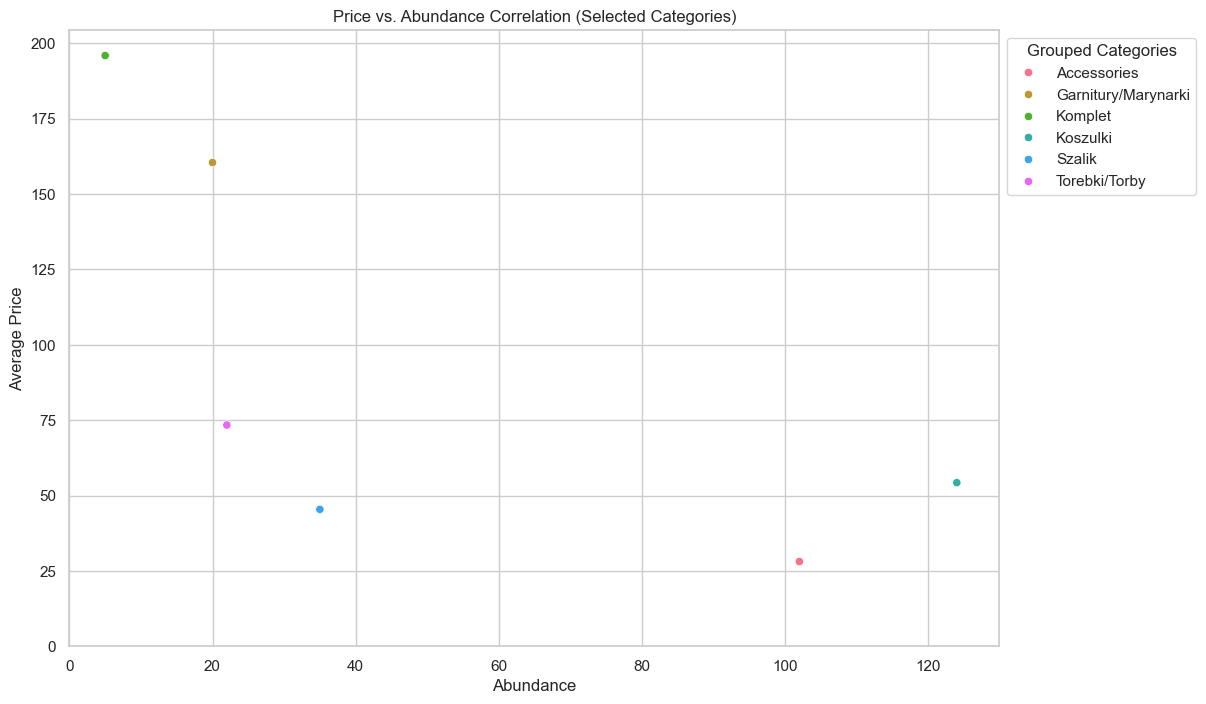

In [81]:
df['Grouped Categories'] = df['Category'].replace({'Torba': 'Torebki/Torby', 'Czapka': 'Accessories', 'Portfel': 'Accessories', 'Opaska': 'Accessories',
                                                    'Rękawiczki':  'Accessories', 'Torebka': 'Torebki/Torby', 'Pasek': 'Accessories',
                                                    'Biżuteria': 'Accessories', 'Skarpetki': 'Accessories', 'Klapki': 'Accessories', 'Kolczyki': 'Accessories',
                                                    'Naszyjnik':  'Accessories', 'Okulary':  'Accessories', 'Kapelusz':  'Accessories', 'Gumka do włosów':  'Accessories',
                                                    'Spodnie':  'Spodnie', 'Jeansy':  'Spodnie', 'Klapki':  'Obuwie', 'Buty':  'Obuwie', 'Kurtka':  'Kurtki/Płaszcze',
                                                    'Płaszcz':  'Kurtki/Płaszcze', 'Sweter':  'Swetry', 'Cienki Sweter':  'Swetry', 'T-shirt':  'Koszulki',
                                                    'Koszulka':  'Koszulki', 'Bluzka':  'Koszulki', 'Koszula':  'Koszulki', 'Garnitur':  'Garnitury/Marynarki',
                                                    'Marynarka':  'Garnitury/Marynarki', 'Sukienka':  'Sukienki/Spódnice', 'Spódnica':  'Sukienki/Spódnice',})

# Convert 'Date of scrap' column to datetime format
df['Date of scrap'] = pd.to_datetime(df['Date of scrap'])

# Sort dataframe by 'Date of scrap' in descending order
df = df.sort_values(by='Date of scrap', ascending=False)

# Keep only the most up-to-date entry for each item
df = df.drop_duplicates(subset=['Product ID'], keep='first')

# Calculate the average price and abundance for each grouped category
category_stats = df.groupby(['Grouped Categories'])['Product Price'].agg(['mean', 'count']).reset_index()
category_stats.columns = ['Grouped Categories', 'Average Price', 'Abundance']

# Choose only specified categories
selected_categories = ['Garnitury/Marynarki', 'Koszulki', 'Komplet', 'Accessories', 'Szalik', 'Torebki/Torby']
category_stats_selected = category_stats[category_stats['Grouped Categories'].isin(selected_categories)]

# Set the style of seaborn
sns.set(style="whitegrid")

# Scatter Plot - Price vs. Abundance Correlation with 'husl' palette
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x="Abundance", y="Average Price", hue="Grouped Categories", data=category_stats_selected, palette='husl')

# Set the limits of the x-axis and y-axis to start from 0
plt.xlim(0)
plt.ylim(0)

scatter_plot.set_title('Price vs. Abundance Correlation (Selected Categories)')
sns.move_legend(scatter_plot, "upper left", bbox_to_anchor=(1, 1))

# Save the plot as an image
output_path = "plotting_results"
os.makedirs(output_path, exist_ok=True)
output_file_path = os.path.join(output_path, f'scatter_plot_selected_categories_{pd.Timestamp.now().strftime("%Y%m%d%H%M%S")}.png')
plt.savefig(output_file_path)

# Show the plot
plt.show()


#### Price Changes for Selected Products Over Days

##### If you want to track different products, change IDs in selected_product_ids = [26152, 25089, 24937, 24965, 22954]

Product ID: 26152, Product Name: Garnitur damski
Product ID: 25089, Product Name: Koszula z falbanami na rękawach szmaragdowa
Product ID: 24937, Product Name: Płaszcz z paskiem
Product ID: 24965, Product Name: Spódnica z paskiem
Product ID: 22954, Product Name: T-shirt oversize z szerokimi rękawami czarny


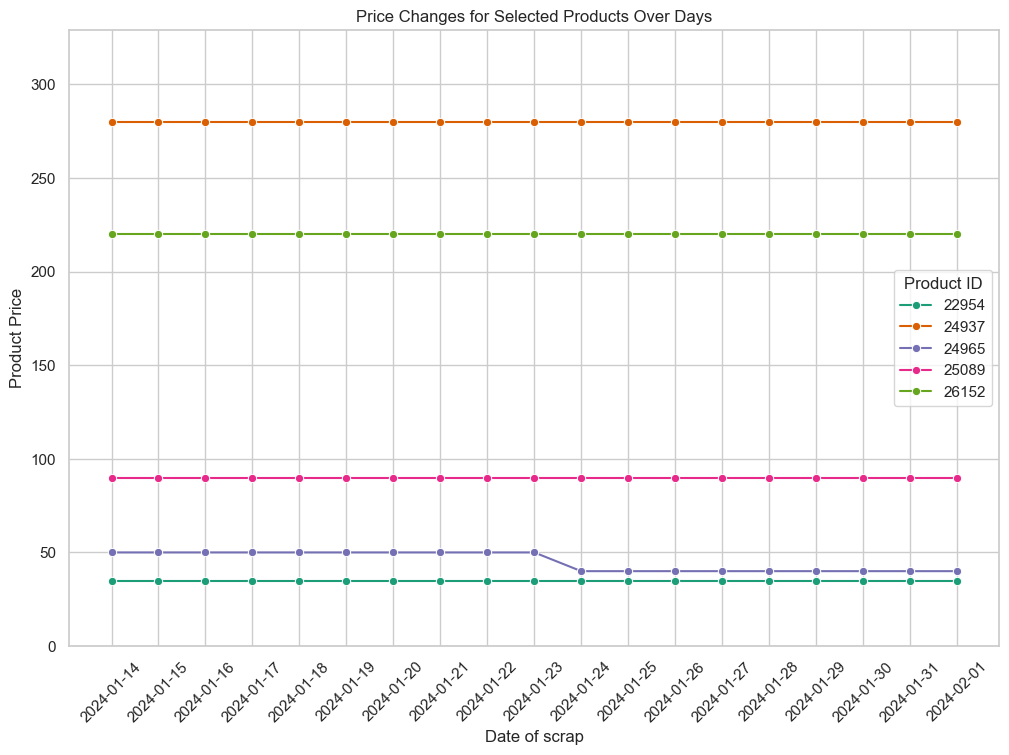

In [82]:
df = pd.read_csv("D:\Projects\PrivateProjects\WebScrapMoodo\single_csv_output\data_for_plotting.csv")
# Select a few Product IDs for analysis
selected_product_ids = [26152, 25089, 24937, 24965, 22954]

# Filter the dataframe for the selected Product IDs
selected_products_df = df[df['Product ID'].isin(selected_product_ids)]

# Print names of the products for selected Product IDs
for product_id in selected_product_ids:
    product_name = df[df['Product ID'] == product_id]['Product Type'].iloc[0]
    print(f"Product ID: {product_id}, Product Name: {product_name}")

# Set the style of seaborn
sns.set(style="whitegrid")

# Line Plot - Price Changes for Selected Products Over Days
plt.figure(figsize=(12, 8))
line_plot = sns.lineplot(x="Date of scrap", y="Product Price", hue="Product ID", data=selected_products_df, marker="o", palette='Dark2')
line_plot.set_title('Price Changes for Selected Products Over Days')
plt.xticks(rotation=45)

# Set y-axis ticks and limit
plt.yticks(range(0, int(selected_products_df['Product Price'].max()) + 50, 50))
plt.ylim(0, int(selected_products_df['Product Price'].max()) + 50)

# Save the plot as an image
output_path = "plotting_results"
os.makedirs(output_path, exist_ok=True)
output_file_path = os.path.join(output_path, f'line_plot_selected_products_{pd.Timestamp.now().strftime("%Y%m%d%H%M%S")}.png')
plt.savefig(output_file_path)

# Show the plot
plt.show()

#### Sum of Product Price and Product Price before Discount for Each Grouped Category

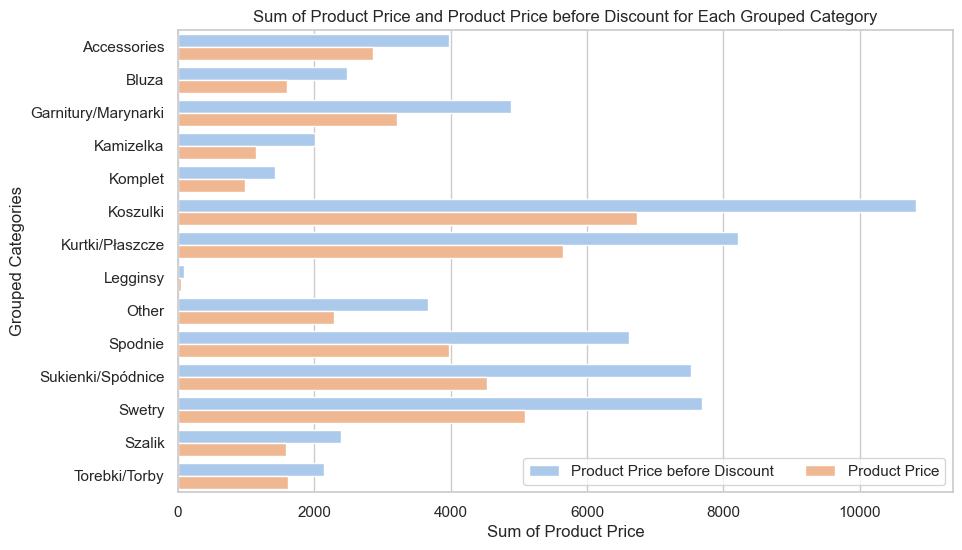

In [87]:
df['Date of scrap'] = pd.to_datetime(df['Date of scrap'])  # Convert 'Date of scrap' to datetime if not already

# Sort the DataFrame by 'Date of scrap' in descending order
df = df.sort_values(by=['Product ID', 'Date of scrap'], ascending=[True, False])

# Keep only the most up-to-date entry for each item
df = df.drop_duplicates(subset=['Product ID'], keep='first').reset_index(drop=True)

# Exclude entries where 'Product Price before Discount' is null
df = df.dropna(subset=['Product Price before Discount'])

# Map the grouped categories
df['Grouped Categories'] = df['Category'].replace({
    'Torba': 'Torebki/Torby', 'Czapka': 'Accessories', 'Portfel': 'Accessories', 'Opaska': 'Accessories',
    'Rękawiczki':  'Accessories', 'Torebka': 'Torebki/Torby', 'Pasek': 'Accessories',
    'Biżuteria': 'Accessories', 'Skarpetki': 'Accessories', 'Klapki': 'Accessories', 'Kolczyki': 'Accessories',
    'Naszyjnik':  'Accessories', 'Okulary':  'Accessories', 'Kapelusz':  'Accessories', 'Gumka do włosów':  'Accessories',
    'Spodnie':  'Spodnie', 'Jeansy':  'Spodnie', 'Klapki':  'Obuwie', 'Buty':  'Obuwie', 'Kurtka':  'Kurtki/Płaszcze',
    'Płaszcz':  'Kurtki/Płaszcze', 'Sweter':  'Swetry', 'Cienki Sweter':  'Swetry', 'T-shirt':  'Koszulki',
    'Koszulka':  'Koszulki', 'Bluzka':  'Koszulki', 'Koszula':  'Koszulki', 'Garnitur':  'Garnitury/Marynarki',
    'Marynarka':  'Garnitury/Marynarki', 'Sukienka':  'Sukienki/Spódnice', 'Spódnica':  'Sukienki/Spódnice',
})

# Continue with the plotting code

sns.set_theme(style="whitegrid")

# Create a new DataFrame with the sum of Product Price before Discount and Product Price for each grouped category
category_sums = df.groupby('Grouped Categories').agg({
    'Product Price before Discount': 'sum', 'Product Price': 'sum'
}).reset_index()

# Melt the DataFrame to have a 'variable' column for distinguishing between the two sums
category_sums_melted = pd.melt(category_sums, id_vars='Grouped Categories', var_name='Sum Type', value_name='Sum')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot with the custom color palette
sns.barplot(x="Sum", y="Grouped Categories", hue="Sum Type", data=category_sums_melted, palette='pastel')

# Add legend and informative axis labels
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Sum of Product Price", ylabel="Grouped Categories", title="Sum of Product Price and Product Price before Discount for Each Grouped Category")

# Save the plot as an image
output_path = "plotting_results"
os.makedirs(output_path, exist_ok=True)
output_file_path = os.path.join(output_path, f'grouped_bar_plot_prices_{pd.Timestamp.now().strftime("%Y%m%d%H%M%S")}.png')
plt.savefig(output_file_path)

# Show the plot
plt.show()
